## Lab 4.3. 

# Hi Qingqing.  I did everything above the prompts.  Sorry about that!

#### Setup your imports

In [4]:
import pandas as pd 
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import f_classif, SelectKBest, VarianceThreshold
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### 1. Pull the training set from the newsgroup data
The data has 20 different categories. Try to shrink down to smaller number of groups according to the definition here:
http://scikit-learn.org/stable/datasets/twenty_newsgroups.html

In [5]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
full = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

In [6]:
y = newsgroups_train.target
x = newsgroups_train.data


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [8]:
# Combine classes into 7
mappy = {
    0: [0],
    1: [1,2,3,4,5],
    2: [6],
    3: [7,8,9,10],
    4: [11,12,13,14],
    5: [15],
    6: [16,17,18,19]
}
def getkey(num):
    for x, y in mappy.items():
        if num in y:
            return x
y_train_new = [getkey(num) for num in y_train]
y_train = y_train_new
labels = ['alt','comp','misc','rec','sci','soc','talk']
print labels

['alt', 'comp', 'misc', 'rec', 'sci', 'soc', 'talk']


In [9]:
mappy = {
    0: [0],
    1: [1,2,3,4,5],
    2: [6],
    3: [7,8,9,10],
    4: [11,12,13,14],
    5: [15],
    6: [16,17,18,19]
}
def getkey(num):
    for x, y in mappy.items():
        if num in y:
            return x
y_test_new = [getkey(num) for num in y_test]
y_test = y_test_new
labels = ['alt','comp','misc','rec','sci','soc','talk']
print labels

['alt', 'comp', 'misc', 'rec', 'sci', 'soc', 'talk']


#### 2. Create the vectorizer 

In [10]:
v = TfidfVectorizer(
stop_words='english',token_pattern='[a-zA-Z]{3,50}',ngram_range=(1,2), max_features=1000
)

In [11]:
pd.DataFrame(x)[0][1]

u"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't answered this\npoll. Thanks."

In [12]:
vec = v.fit(x)
x_train = vec.transform(x_train)

x_test = vec.transform(x_test)

What are top 50 most powerful terms in deciding news groups? (hint: treat it as a classification problem)?

In [13]:
X_train_dense = x_train.todense()
X_test_dense = x_test.todense()
scaler = StandardScaler()
s = scaler.fit(X_train_dense)
X_scld_train = s.transform(X_train_dense)
X_scld_test = s.transform(X_test_dense)

lr = LogisticRegression(multi_class='multinomial', solver='sag')
lr.fit(X_scld_train, y_train)
lr.coef_[:50]

//anaconda/lib/python2.7/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[-0.0105911 , -0.01338736,  0.03984734, ...,  0.03366862,
        -0.02535969,  0.04909505],
       [-0.02605312,  0.13755277, -0.03809752, ...,  0.06614352,
        -0.08376914, -0.08877083],
       [-0.07110886, -0.21011881, -0.10035223, ..., -0.15037285,
        -0.00954511,  0.00214271],
       ..., 
       [ 0.02809427,  0.09250542, -0.01335352, ...,  0.09431968,
         0.02496365, -0.02406615],
       [ 0.02110889,  0.06990032,  0.09135728, ..., -0.07956759,
         0.04572606,  0.04651957],
       [-0.11583065,  0.00365782,  0.03445023, ..., -0.0008986 ,
         0.04023334, -0.01189929]])

In [15]:
X_train_dense = pd.DataFrame(X_train_dense)
coefs = pd.DataFrame(lr.coef_)
coefs.columns = v.vocabulary_
coefs
dicty = {}
for i in coefs:
    dicty[i] = [sum(abs(coefs[i]))]
dicty
from operator import itemgetter
log_reg_imp = sorted(dicty.items(), key=itemgetter(1), reverse=True)[:50]


In [16]:
abs(coefs.ix[0]).sort_values(ascending=False)[:50]

reading          0.440700
actually         0.323061
says             0.292225
motif            0.266777
work             0.232019
said             0.229015
sell             0.226140
entire           0.223700
likely           0.221165
form             0.219411
paper            0.219192
tax              0.216221
lost             0.210521
carry            0.208221
solution         0.205857
aren             0.204026
mother           0.202537
commercial       0.201851
hear             0.199334
bus              0.198362
user             0.196417
care             0.192855
published        0.190834
nsa              0.190367
answer           0.189161
wrong            0.188569
christianity     0.186889
middle           0.186530
result           0.185145
software         0.184071
people           0.182924
method           0.182342
applications     0.179857
bits             0.178459
assume           0.176734
original         0.173566
modem            0.173296
application      0.169962
crime       

In [17]:
coefs

,fit,ground,learn,runs,night,person,similar,room,wonder,teams,...,allows,market,probably,talk,shot,americans,week,kill,general,cover
0,-0.010591,-0.013387,0.039847,-0.023177,0.120947,-0.061090,0.120231,-0.008967,-0.004554,0.079814,...,0.130655,0.093741,0.114954,0.074008,-0.042693,0.090436,0.012623,0.033669,-0.025360,0.049095
1,-0.026053,0.137553,-0.038098,0.090432,-0.059169,0.079267,-0.066503,0.003814,0.129216,0.044882,...,0.095137,0.013585,-0.086483,-0.145876,-0.203746,-0.108662,0.024580,0.066144,-0.083769,-0.088771
2,-0.071109,-0.210119,-0.100352,0.036817,-0.104509,0.195110,0.108703,0.076782,-0.144180,0.035218,...,0.007846,-0.009732,-0.012281,-0.044158,0.059415,0.074249,-0.027314,-0.150373,-0.009545,0.002143
3,0.174381,-0.080110,-0.013852,-0.068379,0.001291,0.054393,-0.135312,0.007364,0.129113,-0.043080,...,-0.103808,-0.120870,-0.016214,0.049295,0.219702,0.041086,-0.088792,0.036707,0.007751,0.026979
4,0.028094,0.092505,-0.013354,-0.003930,-0.016572,-0.332986,0.008673,-0.227350,0.072316,-0.067791,...,-0.113319,-0.129125,0.005196,-0.028518,0.015430,0.009317,0.073685,0.094320,0.024964,-0.024066
5,0.021109,0.069900,0.091357,-0.025218,0.013233,0.101933,-0.077698,0.077310,-0.058779,-0.020769,...,0.087673,0.039574,0.008302,0.068671,-0.049834,0.051538,-0.122671,-0.079568,0.045726,0.046520
6,-0.115831,0.003658,0.034450,-0.006546,0.044779,-0.036627,0.041906,0.071047,-0.123132,-0.028274,...,-0.104183,0.112827,-0.013475,0.026577,0.001726,-0.157965,0.127889,-0.000899,0.040233,-0.011899


In [18]:
lr.score(X_scld_test, y_test)

0.67354043920728446

In [20]:
y_pred = lr.predict(X_scld_test)
con = confusion_matrix(y_test, y_pred)
print classification_report(y_test, y_pred)
con


             precision    recall  f1-score   support

          0       0.38      0.42      0.40       148
          1       0.80      0.79      0.79       948
          2       0.63      0.59      0.61       188
          3       0.67      0.71      0.69       789
          4       0.65      0.65      0.65       795
          5       0.57      0.53      0.55       202
          6       0.65      0.63      0.64       664

avg / total       0.67      0.67      0.67      3734



array([[ 62,   7,   0,  16,  13,  13,  37],
       [  5, 748,  30,  58,  81,   6,  20],
       [  1,  29, 110,  19,  23,   0,   6],
       [ 20,  50,  14, 557,  81,  14,  53],
       [ 21,  85,  13,  98, 513,  10,  55],
       [ 15,   4,   4,   6,  11, 108,  54],
       [ 38,  16,   3,  81,  70,  39, 417]])

In [22]:
sel = SelectKBest(f_classif, k=50)
skb_imp = pd.DataFrame(sel.fit_transform(X_scld, y))
mask = sel.get_support()
imp = pd.DataFrame(np.asarray(v.get_feature_names())[sel.get_support()])
imp.columns = ['sel_k']
imp['logreg'] = sorted([i[0] for i in log_reg_imp])
imp.head()

NameError: name 'X' is not defined

#### 3. Create the Truncated Singular Value Decomposition. 

In [23]:
sc = StandardScaler()
trunc = TruncatedSVD(n_components=5)
truncy = pd.DataFrame(trunc.fit_transform(x_train))

In [24]:
pd.DataFrame(trunc.explained_variance_ratio_)

,0
0,0.005845
1,0.009688
2,0.006981
3,0.005999
4,0.005834


#### 4. Setup your k-means clustering

In [25]:
km = KMeans(n_clusters=7)
km.fit(truncy, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
labels = pd.DataFrame(km.labels_)

In [27]:
thing = pd.concat([pd.DataFrame(y_train), truncy, labels], axis=1)
thing.columns = ['y', 'pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'labels']

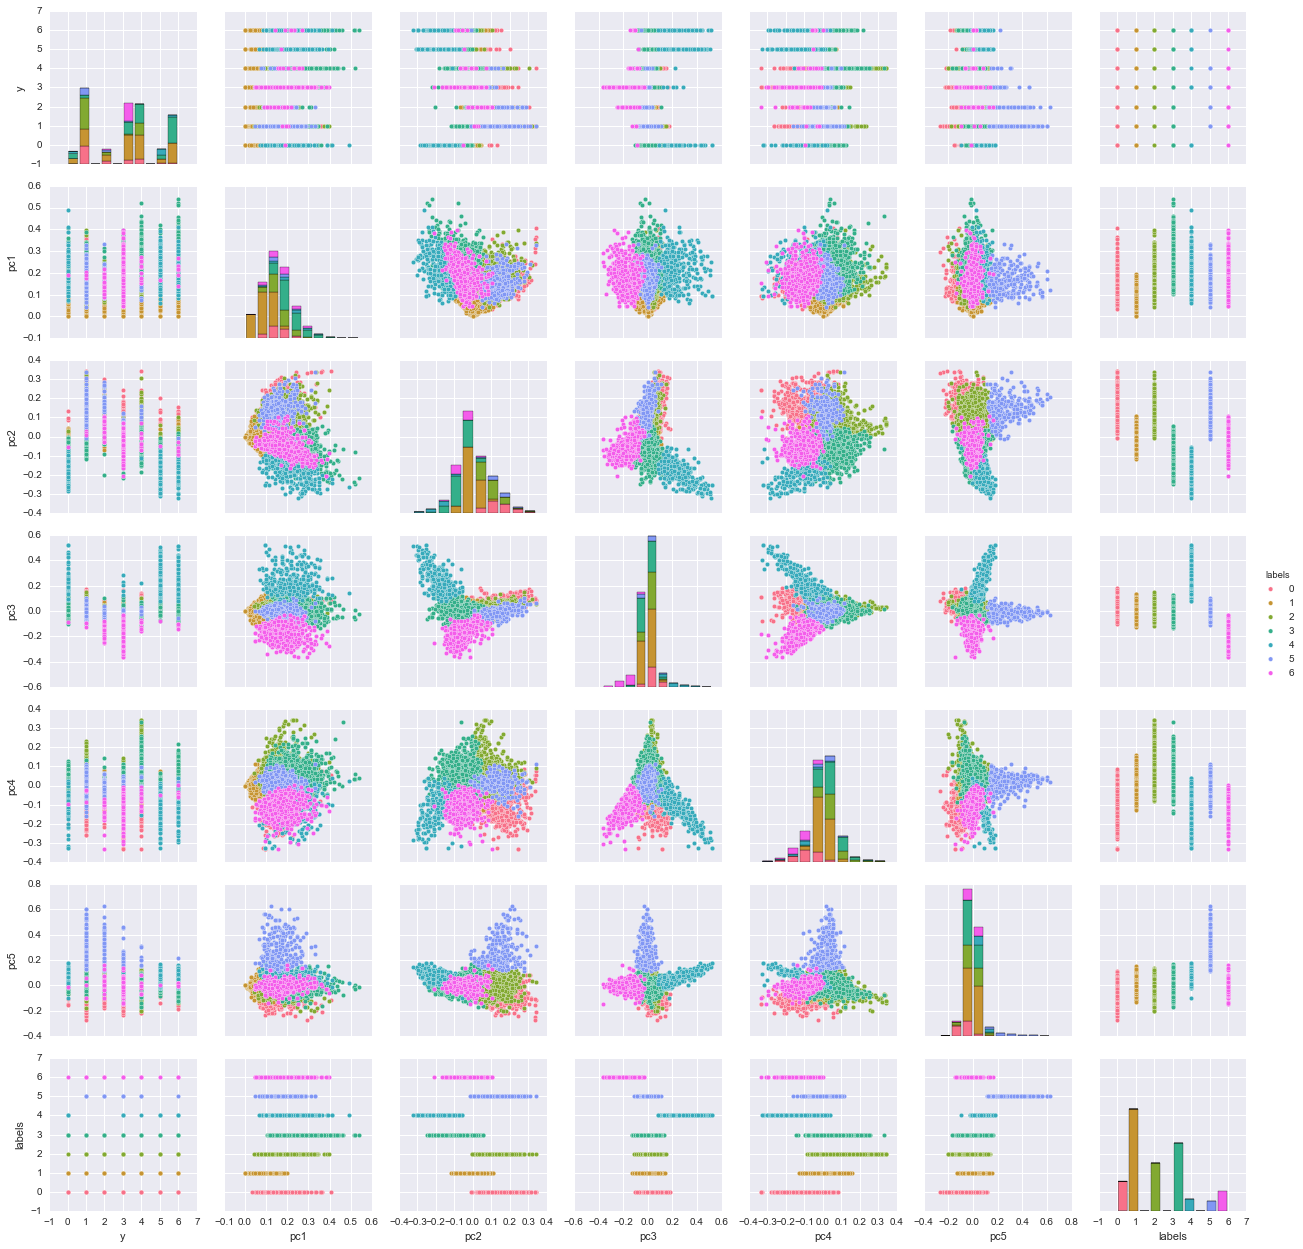

In [28]:
import seaborn as sns
sns.pairplot(thing, hue='labels')

In [29]:
thing['labels'].value_counts()

1    2680
3    1789
2    1241
0     778
6     526
4     304
5     262
Name: labels, dtype: int64

In [38]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(thing['y'], y_pred2))
print("Completeness: %0.3f" % metrics.completeness_score(thing['y'], y_pred2))
print("V-measure: %0.3f" % metrics.v_measure_score(thing['y'], y_pred2))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(thing['y'], y_pred2))


Homogeneity: 0.215
Completeness: 0.226
V-measure: 0.221
Adjusted Rand-Index: 0.102


#### 5. Fit the vectorizer and SVD

In [353]:
# look up np.choose

What are top 50 most useful terms based on article itself? Are those terms similar to the top 50 from step 2? 

Plot the cummulative variace from the terms. x-axis: number of components; y-axis: cummulative variance. 
Based on the plot, decide how many principle components you need. 

#### 7. Fit the kmeans (Question: in this case, do you recommend running K-means without dimension reduction?)

Print out your centroids. Look at the value for each centroid. Does each centroid represent a news group as expected? 

#### 8. Check the performance of our kmeans

#### Classification Report

#### Confusion Matrix. Hint: create a map to translate the label between k-means clustering and the original target (newsgroups_train.target). 

#### Note: Repeat the lab with:
- varying values of "k" 
- trying a different way to pick starting centroids ('k-means++' is the default method for centroids). For example, pick one point from each newsgroup. 